In [207]:
import numpy as np
import matplotlib.pyplot as plt
import math
 

Exercise 1


In [208]:
#This is for plotting results of the original function and the calculated area.
def Plot_func(x,y,x_original,y_original):

    plt.plot(x_original, y_original, color='green')
    

    plt.fill_between(x, y)

    plt.show()

In [209]:
#This is the sin function that can be passed as a parameter of a Python function
def sin(x):
    return np.sin(x)

In [210]:
#This is the Midpoint calculation which follows the equation of the lab2.pdf
def Midpoint(func,a,b,n):
    
    #If there is  n==0, we can't calculate.
    if n == 0:
        print("No solution for 0 interval.")
        return 



    h = (b-a)/n
    sum = 0
    

    
    #for plotting
    x_list = []
    y_list = []

    for i in range(0,n):
        #This is the upgrade part
        sum += h * func((h*i+h*(i+1))/2)

        #These lists are for plotting 
        x_list.append((h*i+h*(i+1))/2)
        y_list.append(func((h*i+h*(i+1))/2))

    return x_list,y_list,sum



    

This is the sum:
1.0000160639898805


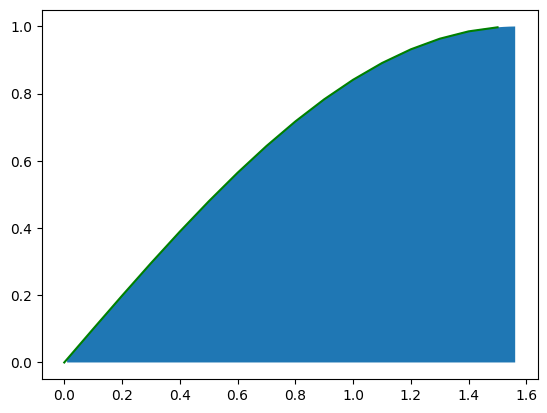

In [211]:


#a and b are the two endpoint of the integral respectively
a = 0
b = np.pi/2

#How many steps will we take. The more we take the more precise we'll get. Could be an outcome of a precision we desire.
steps=80

#for plotting
x_original = np.arange(a, b, 0.1)
y_original = np.sin(x_original)


x,y,AreaSum = Midpoint(sin,a,b,steps)

print("This is the sum:")
print(AreaSum)


Plot_func(x,y,x_original,y_original)

In [212]:
def Trapezoidal(func,a,b,n,forget=False):
    
    #No value return as no subintervals
    if n == 0:
        print("No solution for 0 interval.")
        return 

    h = (b-a)/n
    
    sum = 0
    
    #for plotting
    x_list = []
    y_list = []

    for i in range(0,n+1):
        
        #If we forgot to use he endpoint the if is False
        if not forget:
            #upgrade step at the endpoints
            if i ==0 or i == n:
                
                sum += h/2 * (func(h*i))
        

                #for plotting
                x_list.append(h*i)
                y_list.append(func(h*i))
                
                continue
        
        #upgrade step
        sum += h * (func(h*i))
        
        
        #for plotting
        x_list.append(h*i)
        y_list.append(func(h*i))
            

    
    return x_list,y_list,sum



This is the sum:
0.9999794382396079


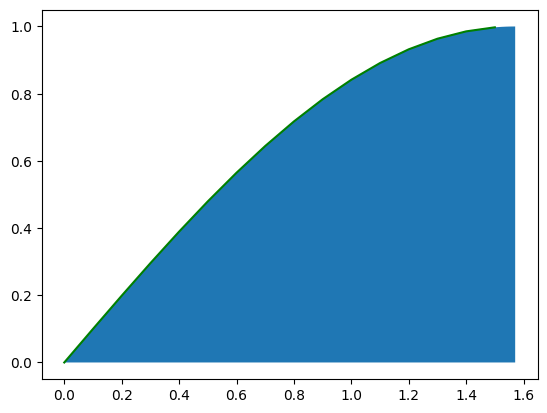

In [213]:
#integral endpoint
a = 0
b = np.pi/2

#How many iterations do we do
steps =100

x_original = np.arange(a, b, 0.1)
y_original = np.sin(x_original)

x,y,AreaSum = Trapezoidal(sin,a,b,steps)

print("This is the sum:")
print(AreaSum)

Plot_func(x,y,x_original,y_original)

In [214]:
def Simpsons(func,a,b,n):
    if n == 0:
        print("No solution for 0 interval.")
        return 

    h = (b-a)/n
    
    sum = 0

    
    #for plotting
    x_list = []
    y_list = []


    #This is the equation of lab2 Simpsons, where it goes from 0 to 2n handeling different endpoints.
    for i in range(0,2*n):
        if i ==0 or i == 2*n:
            sum += h/6 * (func(h*i))
            if i == 0:
                x_list.append(h*i)
                y_list.append(func(h*i))
            continue

        if i%2 == 0:
            sum += h/3 * (func(h*i))
            if i <= n:
                x_list.append(h*i)
                y_list.append(func(h*i))
        else:
            sum += h*2/3 * (func(h*i))
            
            if i <= n:
                x_list.append(h*i)
                y_list.append(func(h*i))


    return x_list,y_list,sum

This is the sum:
1.0000000003382363


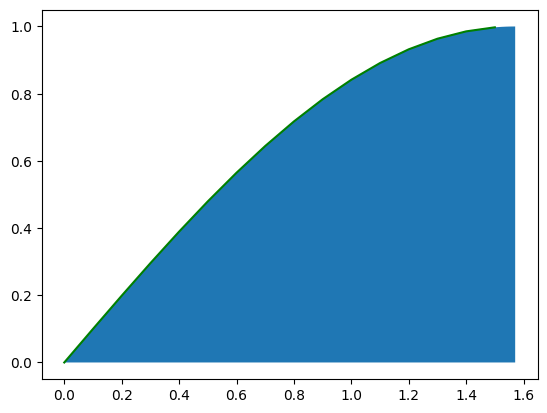

In [215]:
#Integral endpoints
a = 0
b = np.pi/2

#Taken steps
steps = 100

x_original = np.arange(a, b, 0.1)
y_original = np.sin(x_original)


x,y,AreaSum = Simpsons(sin,a,b,steps)

print("This is the sum:")
print(AreaSum)

Plot_func(x,y,x_original,y_original)


Exercise 1 b)

Determine the convergence rate 'r'.

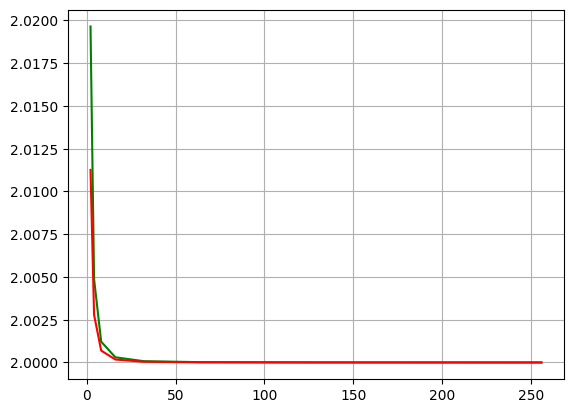

In [216]:
# The original value:
original = 1

list_r_M = []
list_r_T = []
list_r_S = []

# Going thru a list to see at bigger N how fast does each algorithm converge.
# n+1 element of the list is handled by 2*current N.
# 'r' is calculated in the sowhn way in error1,error2,error3  
max_range = max_range = [2,4,8,16,32,64,128,256]
for N in max_range:
    #Calculation for Midpoint:
    _,_,calculated_M_N = Midpoint(sin,0,np.pi/2,N)
    _,_,calculated_M_2N = Midpoint(sin,0,np.pi/2,2*N)
    error1 = math.log2((abs(1-calculated_M_N))/(abs(1-calculated_M_2N)))
    list_r_M.append(error1)
    
    #Calculation for Trapezoidal:
    _,_,calculated_T_N = Trapezoidal(sin,0,np.pi/2,N)
    _,_,calculated_T_2N = Trapezoidal(sin,0,np.pi/2,2*N)
    error2 = math.log2((abs(1-calculated_T_N))/(abs(1-calculated_T_2N)))
    list_r_T.append(error2)
    
    #Calculation for Simpsons:
    _,_,calculated_S_N = Simpsons(sin,0,np.pi/2,N)
    _,_,calculated_S_2N = Simpsons(sin,0,np.pi/2,2*N)
    error3 = math.log2((abs(1-calculated_S_N))/(abs(1-calculated_S_2N)))
    list_r_S.append(error3)

    

#This part is for plotting(only T and M, S is in the next cell):
#C =1
plt.grid()
plt.plot(max_range, list_r_M, color='green')
plt.plot(max_range, list_r_T, color='red')



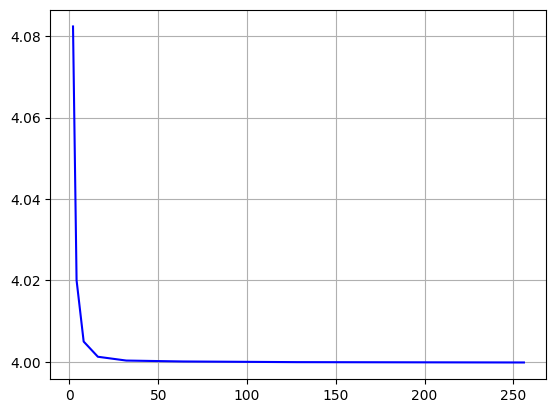

In [217]:

#Plot of r convergence of Simposns
plt.grid()
plt.plot(max_range, list_r_S, color='blue')

Exercise 1c)

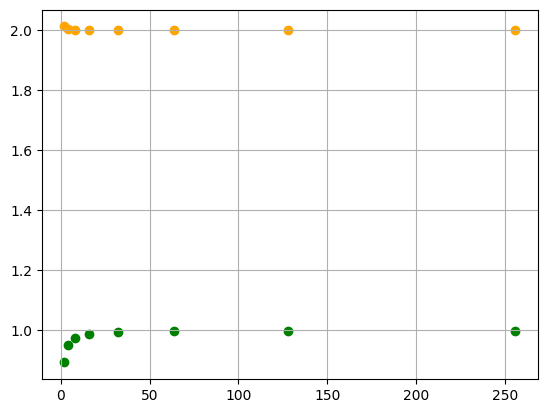

In [218]:
original = 1

temp = list_r_T

list_ = []



max_range = [2,4,8,16,32,64,128,256]
for N in max_range:

    _,_,calculated_T_forgot_N = Trapezoidal(sin,0,np.pi/2,N,True)
    _,_,calculated_T_forgot_2N = Trapezoidal(sin,0,np.pi/2,2*N,True)
    
    error2 = math.log2((abs(1-calculated_T_forgot_N))/(abs(1-calculated_T_forgot_2N)))
    
    list_.append(error2)


plt.grid()
# Original which converges is to 2
plt.scatter(max_range, temp, color='orange')

# The bad example, which converges is to 1
plt.scatter(max_range, list_, color='green')



Exercise 2a)

The exact solution:

In [219]:
def func(y0,t):
    return y0/(np.sqrt(y0**2-(y0**2-1)*np.exp(-2*t))) 

In [220]:
def diff_eq(y_t):
    return y_t - y_t**3

In [221]:
#Euler Method iterativly. Steps is N, if taken N steps, than we return.
def Euler_method(func,y0,yn,h,t,steps):
    if t == 0:
        y_next = y0
        return Euler_method(func,y0,y_next,h,t+h,steps-1)
    
    if steps == 0:
        return yn
    

    m = func(yn)
    
    y_next = yn + h * m
    
    return Euler_method(func,y0,y_next,h,t+h,steps-1)


In [222]:
#Just some random input for examining the workflow, the y0 was choosen by 2b)
y0=0.1

t=0
T = 10
N = 100
h = T/N
steps=2

s=Euler_method(diff_eq,y0,y0,h,t,steps)
print(func(s,t))

0.10990000000000001


In [223]:
#It is a function, as a parameter input for the simple iterationd derived from x_next = g(next)
def simple_func(y_t,c,h):
    return c + h*(y_t - y_t**3)

Simple Iteration:


In [224]:
def Simple_iteration(x,f,c,h,precision,iter):
    x_next = f(x,c,h)

    if abs(f(x,c,h) - f(x_next,c,h)) > precision:
        return Simple_iteration(x_next,f,c,h,precision,iter+1)
    
    return x_next, iter

Backward Euler:

In [225]:
# For backward calculating nonlinear algebraic equation is done by a simple iteration, as it will converge to this fixpoint.
  
def Backward_Euler(func,y0,yn,h,t,steps):
    if t == 0:
        y_next = y0
        return Backward_Euler(func,y0,y_next,h,t+h,steps-1)
    
    if steps == 0:
        return yn
    

    m = diff_eq(yn)

    temp = yn + h * m
    result,_ = Simple_iteration(temp,simple_func,yn,h,10**(-4),0)
    y_next = simple_func(result,yn,h)
    
    return Backward_Euler(func,y0,y_next,h,t+h,steps-1)


In [226]:
#Just some random input for examining the workflow, the y0 was choosen by 2b)
y0=0.1

t=0
T = 10
N = 100
h = T/N
steps=16

s=Backward_Euler(func,y0,y0,h,t,steps)
print(s)

0.4327564097475907


Crank-Nicolson Method:

In [227]:
# It is a function, as a parameter input for the simple iterationd derived from x_next = g(next).
# It is the equation from the lab2.pdf of Crank Nilson formula
def crank_nicolson_f(y_t,c,h):
    return c + 0.5*h*(y_t - y_t**3)+0.5*h*(c - c**3)

In [228]:
def Crank_Nicolson(func,y0,yn,h,t,steps):
    if t == 0:
        y_next = y0
        return Crank_Nicolson(func,y0,y_next,h,t+h,steps-1)
    
    if steps == 0:
        return yn
    

    m = diff_eq(yn)

    temp = yn + h * m
    result,_ = Simple_iteration(temp,crank_nicolson_f,yn,h,10**(-4),0)
    y_next = crank_nicolson_f(result,yn,h)
    
    return Crank_Nicolson(func,y0,y_next,h,t+h,steps-1)

In [229]:
#Just some random input for examining the workflow, the y0 was choosen by 2b)
y0=0.1

t=0
T = 10
N = 100
h = T/N
steps=N

s=Crank_Nicolson(func,y0,y0,h,t,steps)
print(s)

0.9999998822661528


Exercise 2b)

For the alst exercise I had to tell the distance of two upcoming estimations, and if the difference between two estimations (the previous and current) is really small (given by the precision), than we say we have converged, and finish our search. The converges of different methods is printed out step by step and their change is plotted below. 

In [230]:
T = 1
y0 = 0.1

prev_e =1
curr_e= 10
rate = curr_e/prev_e
precision = 0.001
N = 0


list1=[]
list2=[]


while abs(1-rate) > precision:
    N += 1
    prev_e = curr_e
    
    h= T/N
    curr_e = Euler_method(diff_eq,y0,y0,h,0,N)
    rate = curr_e/prev_e

    list1.append(N)
    list2.append(rate)
    
    print("At this N: "  + str(N))
    print("The error measure is: " + str(rate))





At this N: 1
The error measure is: 0.01
At this N: 2
The error measure is: 1.495
At this N: 3
The error measure is: 1.180930575250836
At this N: 4
The error measure is: 1.095310118507781
At this N: 5
The error measure is: 1.0590880933105353
At this N: 6
The error measure is: 1.0402785225603277
At this N: 7
The error measure is: 1.0292360369252118
At this N: 8
The error measure is: 1.022194070169948
At this N: 9
The error measure is: 1.0174257922469125
At this N: 10
The error measure is: 1.0140464594643266
At this N: 11
The error measure is: 1.0115639242968788
At this N: 12
The error measure is: 1.0096864466742714
At this N: 13
The error measure is: 1.0082320712233033
At this N: 14
The error measure is: 1.0070824929189939
At this N: 15
The error measure is: 1.0061580723725256
At this N: 16
The error measure is: 1.0054035955408442
At this N: 17
The error measure is: 1.0047798006538107
At this N: 18
The error measure is: 1.004258148023516
At this N: 19
The error measure is: 1.003817487371

In [231]:
T = 1
y0 = 0.1

prev_e =1
curr_e= 10
rate = curr_e/prev_e
precision = 0.001
N = 0

list3=[]
list4=[]


while abs(1-rate) > precision:
    N += 1
    prev_e = curr_e
    
    h= T/N
    curr_e = Backward_Euler(diff_eq,y0,y0,h,0,N)
    rate = curr_e/prev_e

    list3.append(N)
    list4.append(rate)
    
    print("At this N: "  + str(N))
    print("The error measure is: " + str(rate))





At this N: 1
The error measure is: 0.01
At this N: 2
The error measure is: 1.92760969898972
At this N: 3
The error measure is: 1.1277221599263096
At this N: 4
The error measure is: 1.0541980587766075
At this N: 5
The error measure is: 1.0307962856428883
At this N: 6
The error measure is: 1.0192913979330118
At this N: 7
The error measure is: 1.0138074277005382
At this N: 8
The error measure is: 1.010130057462796
At this N: 9
The error measure is: 1.0077559630456574
At this N: 10
The error measure is: 1.0060563254303454
At this N: 11
The error measure is: 1.0047546764536357
At this N: 12
The error measure is: 1.0040597380236809
At this N: 13
The error measure is: 1.003529636876322
At this N: 14
The error measure is: 1.0030029874760764
At this N: 15
The error measure is: 1.0025863977738865
At this N: 16
The error measure is: 1.0022511296544874
At this N: 17
The error measure is: 1.0019772646340113
At this N: 18
The error measure is: 1.0017506401784888
At this N: 19
The error measure is: 1

In [232]:
T = 1
y0 = 0.1

prev_e =1
curr_e= 10
rate = curr_e/prev_e
precision = 0.001
N = 0

list5=[]
list6=[]

while abs(1-rate) > precision:
    N += 1
    prev_e = curr_e
    
    h= T/N
    curr_e = Crank_Nicolson(diff_eq,y0,y0,h,0,N)
    rate = curr_e/prev_e
    
    list5.append(N)
    list6.append(rate)

    
    print("At this N: "  + str(N))
    print("The error measure is: " + str(rate))





At this N: 1
The error measure is: 0.01
At this N: 2
The error measure is: 1.6483040682064491
At this N: 3
The error measure is: 1.1707610064400977
At this N: 4
The error measure is: 1.0812701626961148
At this N: 5
The error measure is: 1.0479773306048938
At this N: 6
The error measure is: 1.0316765990167633
At this N: 7
The error measure is: 1.0223250388920244
At this N: 8
The error measure is: 1.01685339834771
At this N: 9
The error measure is: 1.0130893727439492
At this N: 10
The error measure is: 1.0104487293499644
At this N: 11
The error measure is: 1.0085351348678144
At this N: 12
The error measure is: 1.00710379855581
At this N: 13
The error measure is: 1.0060050574237915
At this N: 14
The error measure is: 1.005143177561101
At this N: 15
The error measure is: 1.004454585054396
At this N: 16
The error measure is: 1.00389570912058
At this N: 17
The error measure is: 1.0034358719697485
At this N: 18
The error measure is: 1.0030529638650996
At this N: 19
The error measure is: 1.002

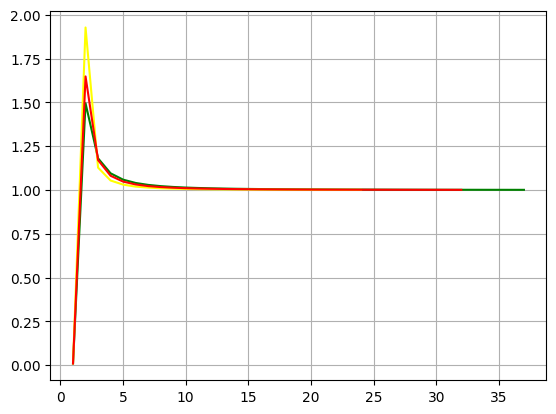

In [233]:
plt.grid()

#Euler
plt.plot(list1, list2, color='green')
#Backward_Euler
plt.plot(list3, list4, color='Yellow')
#Crank and Nilson
plt.plot(list5, list6, color='Red')